# 1. Import Libraries

In [316]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 2. Import Data

In [317]:
df = pd.read_csv("hotel_bookings.csv", delimiter = ",")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 3. Data Overview

In [318]:
df.shape

(119390, 32)

In [319]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')



**Column Discription**

**hotel** = hotel name<br>
**is_canceled** = boolean variable stating if booking canceled or not<br>
**lead_time** = number of elapsed days between booking executed and arrival date<br>
**arrival_date_year** = year of arrival date<br>
**arrival_date_month** = month of arrival date<br>
**arrival_date_week_number** = week number of year for arrival date<br>
**arrival_date_day_of_month** = day of arrival date<br>
**stays_in_weekend_nights** = number of weekend nights (Saturday or Sunday) spent for the booking<br>
**stays_in_week_nights** = number of week nights (Monday to Friday) spent for the booking<br>
**adults** = number of adults per booking<br>
**children** = number of children per booking<br>
**babies** = number of babies per booking<br>
**meal** = type of meal booked per booking<br>
**country** = guest origin country (ISO 3155–3:2013 format)<br>
**market_segment** = market segment designation<br>
**distribution_channel** = booking distribution channel<br>
**is_repeated_guest** = boolean variable indicating if repeated guest or not<br>
**previous_cancellations** = number of previous bookings that were cancelled by the customer prior to the current booking<br>
**previous_bookings_not_canceled** = number of previous bookings not cancelled by the customer prior to the current booking<br>
**reserved_room_type** = code of room type reserved<br>
**assigned_room_type** = code for the type of room assigned to the booking<br>
**booking_changes** = number of changes/amendments made to the booking from the moment the booking was entered<br>
**deposit_type** = indication on if the customer made a deposit to guarantee the booking<br>
**agent** = ID of the travel agency that made the booking<br>
**company** = ID of the company/entity that made the booking or responsible for paying the booking.<br>
**days_in_waiting_list** = number of days the booking was in the waiting list before it was confirmed to the customer<br>
**customer_type** = type of booking made<br>
**adr** = average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights<br>
**required_car_parking_spaces** = number of car parking spaces required by the customer<br>
**total_of_special_requests** = number of special requests made by the customer (e.g. twin bed or high floor)<br>
**reservation_status** = reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out<br>
**reservation_status_date** = date at which the last status was set. This variable can be used in conjunction with the ReservationStatus<br>



In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [321]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [322]:
# for the columns containing object dtype, check which are the unique values and how many are they: 
for column_name in df.describe(include = 'object').columns:
    print(f"\nColumn name: {column_name}\n")
    print(f"There are {len(df[column_name].unique())} unique values. These are:\n{df[column_name].unique()}\n")
    print('='*70)


Column name: hotel

There are 2 unique values. These are:
['Resort Hotel' 'City Hotel']


Column name: arrival_date_month

There are 12 unique values. These are:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


Column name: meal

There are 5 unique values. These are:
['BB' 'FB' 'HB' 'SC' 'Undefined']


Column name: country

There are 178 unique values. These are:
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN

# 4. Statistical Summary of the Data

In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [324]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


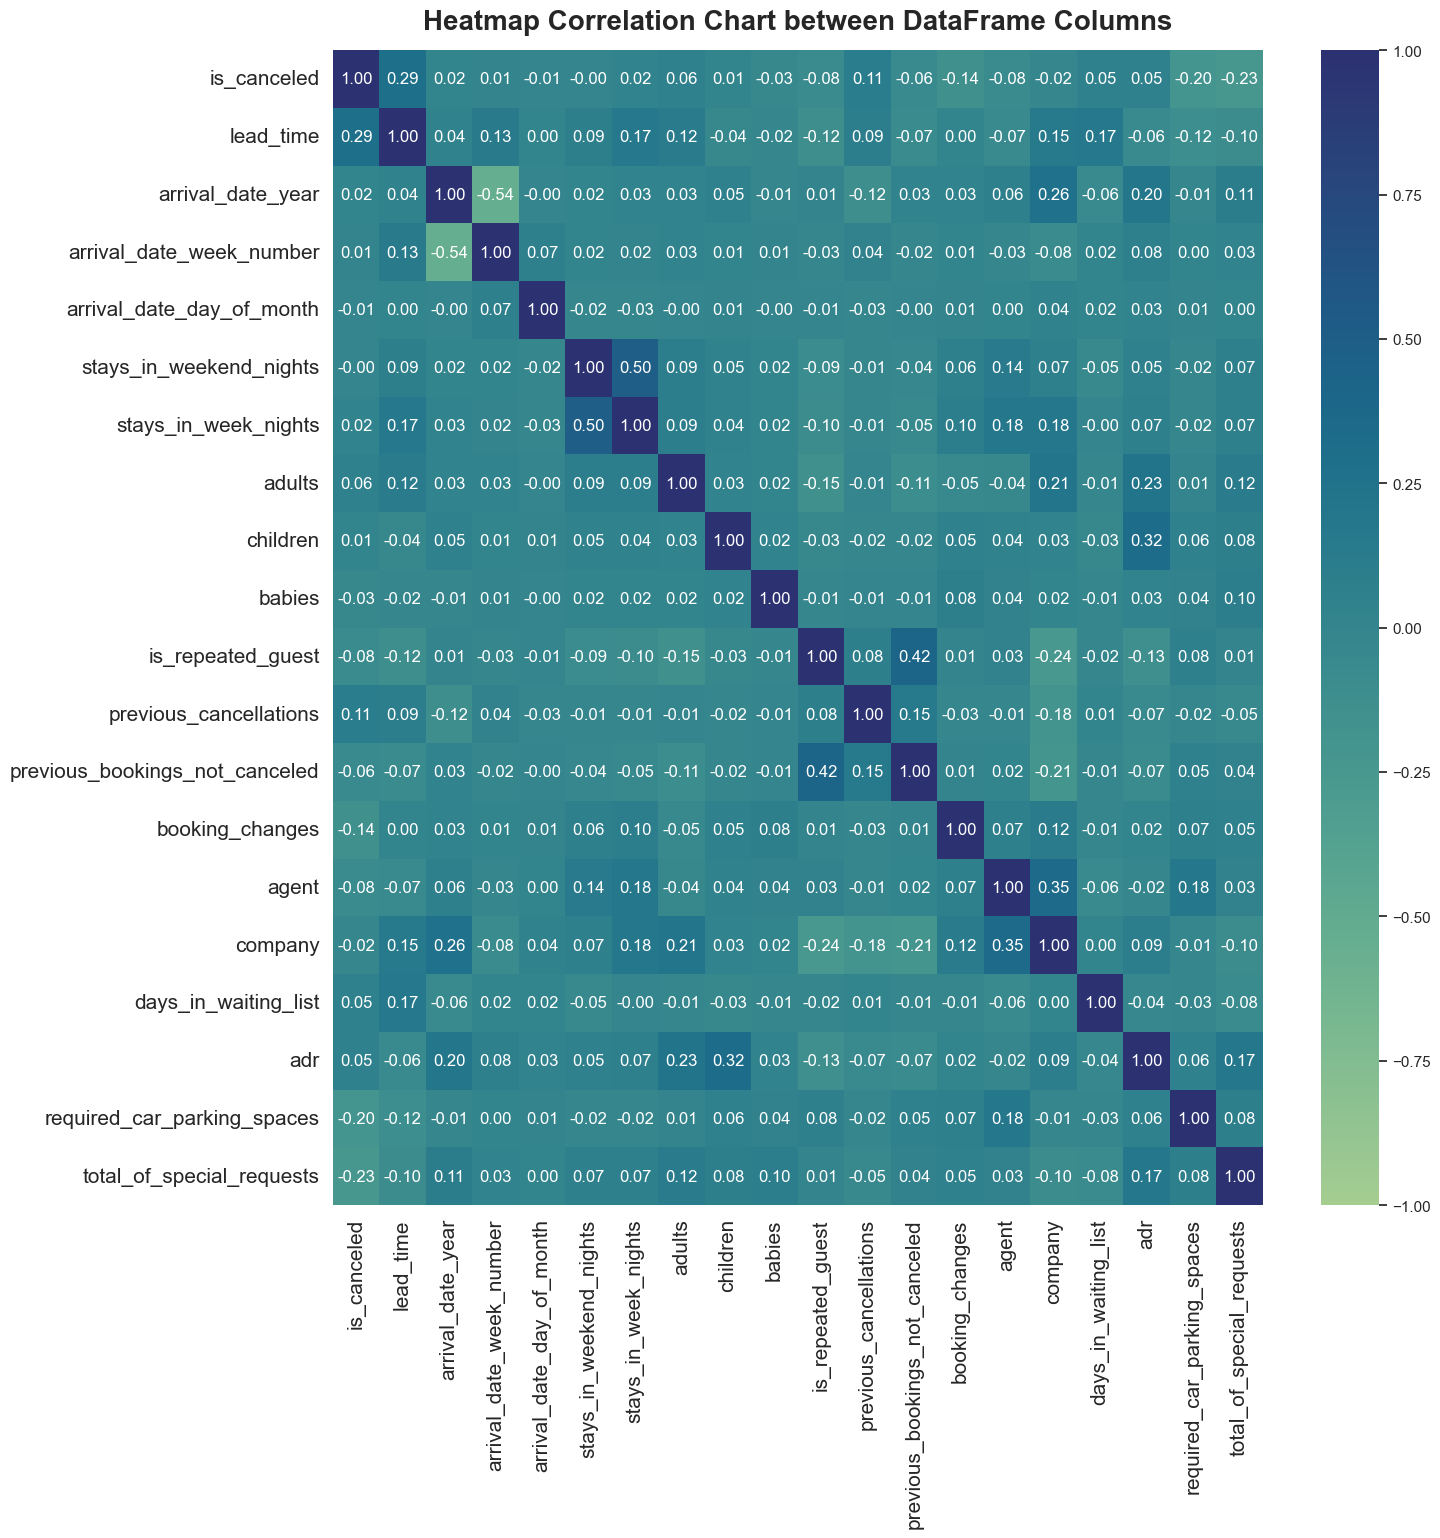

In [325]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True, 
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            cmap = "crest")
plt.title("Heatmap Correlation Chart between DataFrame Columns", fontsize = 20, fontweight = "bold", pad = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# 5. Data Cleaning and Preparation for EDA

In [326]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [327]:
# check the percentage of the nan values in the dataset :
print("The percentage of the missing data per column:")
for i in df.columns:
    if df[i].isnull().any():
        print(i.ljust(15), "{:.4f} %".format(df[i].isnull().sum()/df.shape[0]*100).rjust(15))

The percentage of the missing data per column:
children               0.0034 %
country                0.4087 %
agent                 13.6862 %
company               94.3069 %


In [328]:
# due to the high number of nan values in the 'company' column, drop this column.
df = df.drop('company',axis = 1, errors = 'ignore')
# for the other columns containing nan values, drop the nan values:
df = df.dropna(axis=0)

In [329]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# 6. Exploratory Data Analysis (EDA)

## 6.1 How is the booking market share registered per hotel?

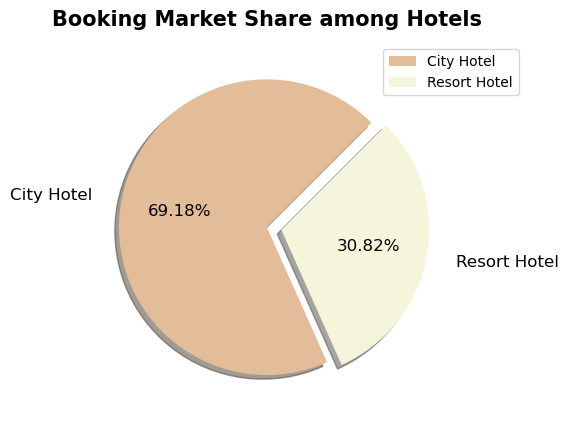

In [19]:
bookings_per_hotel = df.groupby('hotel').size()
plt.pie(bookings_per_hotel.values, 
        labels = bookings_per_hotel.index, 
        startangle = 45, 
        colors=['#E3BC9A','#F5F5DC'],
        autopct='%.2f%%',
        labeldistance = 1.2,
        explode = [0, .1],
        textprops={'fontsize': 12},
        shadow = True)
plt.title("Booking Market Share among Hotels", fontsize = 15, fontweight = 'bold', pad = 12)
plt.legend(bbox_to_anchor = (1, 0.5, 0.2, 0.5), facecolor = "white")
plt.show()

## 6.2 What are the most booked months for each hotel per year?

In [331]:
months_in_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] 

df_bookings_per_month = df.groupby(["arrival_date_month", "arrival_date_year", "hotel"])["hotel"].count().to_frame(name = "counter").reset_index()
df_bookings_per_month['arrival_date_month'] = pd.Categorical(df_bookings_per_month['arrival_date_month'], categories = months_in_order, ordered=True)
df_bookings_per_month = df_bookings_per_month.sort_values(by = ["arrival_date_month", "arrival_date_year"]).reset_index(drop = True)

In [332]:
# Lets answer the question numerically firts, before proceeding to the graphical solution and trend visualization
for year in df_bookings_per_month.arrival_date_year.unique(): 
    print(f"{year}:")
    for hotel in df_bookings_per_month.hotel.unique():
        q_df = df_bookings_per_month.loc[(df_bookings_per_month.hotel == hotel) & (df_bookings_per_month.arrival_date_year == year)]
        print(f'For {hotel}, the best business month was {q_df.loc[q_df.counter == q_df.counter.max()]["arrival_date_month"].item()}, where {q_df.loc[q_df.counter == q_df.counter.max()]["counter"].item()} bookings were registered.')
    print()

2016:
For City Hotel, the best business month was October, where 3953 bookings were registered.
For Resort Hotel, the best business month was August, where 1518 bookings were registered.

2017:
For City Hotel, the best business month was May, where 3949 bookings were registered.
For Resort Hotel, the best business month was August, where 1668 bookings were registered.

2015:
For City Hotel, the best business month was September, where 3234 bookings were registered.
For Resort Hotel, the best business month was September, where 1312 bookings were registered.



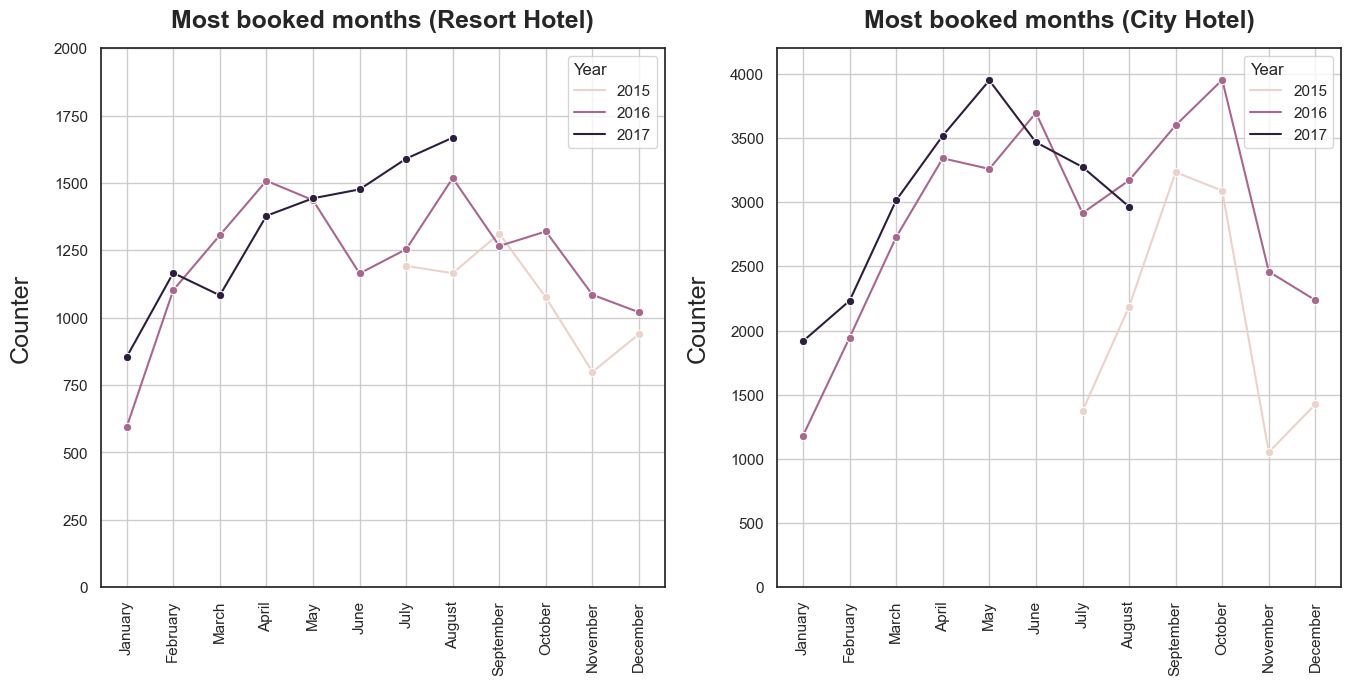

In [333]:
sns.set_theme(style="white")
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_bookings_per_month.loc[df_bookings_per_month.hotel == "Resort Hotel"], 
             x = "arrival_date_month", 
             y = "counter", 
             hue = "arrival_date_year", 
             errorbar = None, 
             orient = "x", 
             marker = "o")
plt.title("Most booked months (Resort Hotel)", fontsize = 18, fontweight = "bold", pad = 15)
plt.xlabel("")
plt.ylabel("Counter", fontsize = 18, labelpad = 15)
plt.ylim([0, 2000])
plt.xticks(rotation = 90)
plt.grid(visible = True)
plt.legend(title = "Year", alignment = "left")

plt.subplot(1, 2, 2)
sns.lineplot(data = df_bookings_per_month.loc[df_bookings_per_month.hotel == "City Hotel"], 
             x = "arrival_date_month", 
             y = "counter", 
             hue = "arrival_date_year", 
             errorbar = None, 
             orient = "x", 
             marker = "o")
plt.title("Most booked months (City Hotel)", fontsize = 18, fontweight = "bold", pad = 15)
plt.xlabel("")
plt.ylabel("Counter", fontsize = 18, labelpad = 15)
plt.xticks(rotation = 90)
plt.ylim([0, 4200])
plt.grid(visible = True)
plt.legend(title = "Year", alignment = "left")
plt.show()

## 6.3 What kind of customers did the booking (per hotel and overall)?

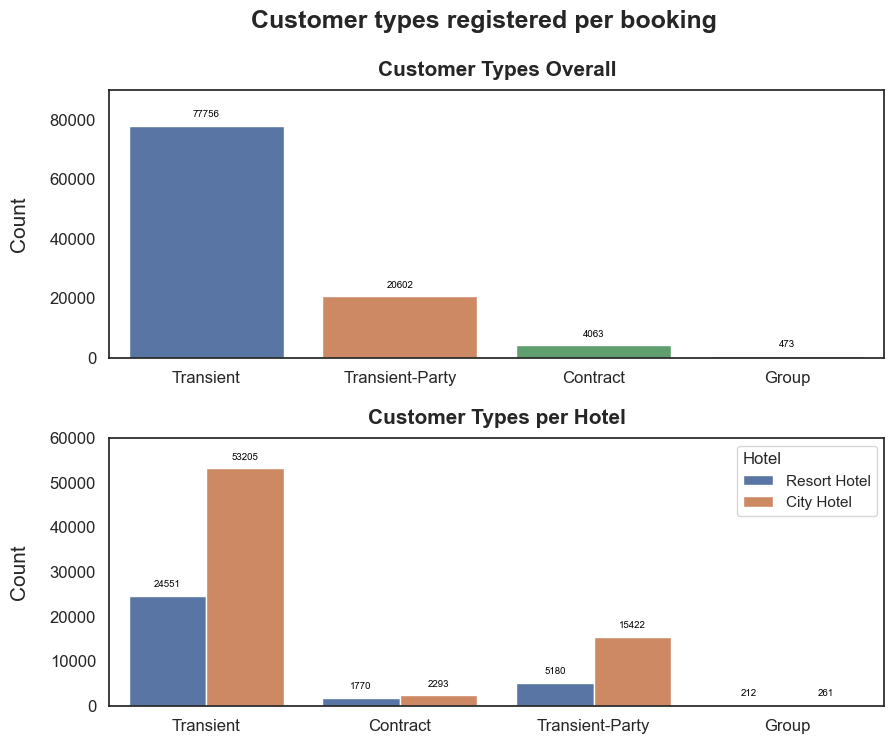

In [334]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.suptitle("Customer types registered per booking", fontsize = 18, fontweight = "bold")

customer_types_overall = df.customer_type.value_counts().to_frame(name = "Count")
ax = sns.barplot(data = customer_types_overall, 
                 x = customer_types_overall.index.values, 
                 y = "Count")
plt.title("Customer Types Overall", fontsize = 15, fontweight = "bold", pad = 10)
# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate(int(height),
                (x + width/2, y + height),
                xytext = (0, 5),
                textcoords = 'offset points',
                ha='center', 
                va = 'bottom',
                rotation = 0, 
                color = 'black',
                fontsize = 7)
plt.ylim([0, 90000])
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15, labelpad = 15)
plt.yticks(fontsize = 12)

plt.subplot(2,1,2)
plt.title("Customer Types per Hotel", fontsize = 15, fontweight = "bold", pad = 10)
ax = sns.countplot(data = df,
                   x = "customer_type", 
                   hue = "hotel")
# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate(int(height),
                (x + width/2, y + height),
                xytext = (0, 5),
                textcoords = 'offset points',
                ha='center', 
                va = 'bottom',
                rotation = 0, 
                color = 'black',
                fontsize = 7)
plt.ylim([0, 60000])
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15, labelpad = 15)
plt.xlabel("")
plt.yticks(fontsize = 12)
plt.legend()

plt.subplots_adjust(hspace = 0.3)   # set the spacing between subplots
plt.legend(title = "Hotel", alignment = "left")
plt.show()

## 6.4 What deposit type is preffered (per hotel and overall)?

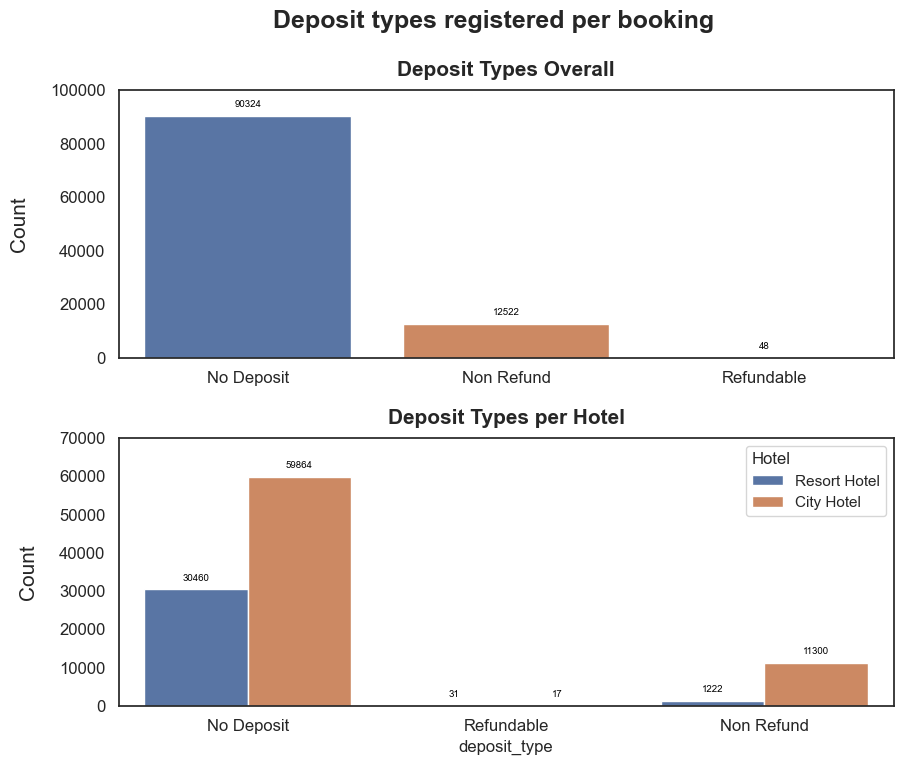

In [335]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.suptitle("Deposit types registered per booking", fontsize = 18, fontweight = "bold")

deposit_types_overall = df.deposit_type.value_counts().to_frame(name = "Count")
ax = sns.barplot(data = deposit_types_overall, 
            x = deposit_types_overall.index.values, 
            y = "Count")
plt.title("Deposit Types Overall", fontsize = 15, fontweight = "bold", pad = 10)
# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate(int(height),
                (x + width/2, y + height),
                xytext = (0, 5),
                textcoords = 'offset points',
                ha='center', 
                va = 'bottom',
                rotation = 0, 
                color = 'black',
                fontsize = 7)
plt.ylim([0, 100000])
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15, labelpad = 15)
plt.yticks(fontsize = 12)

plt.subplot(2,1,2)
plt.title("Deposit Types per Hotel", fontsize = 15, fontweight = "bold", pad = 10)
ax = sns.countplot(data = df,
                   x = "deposit_type", 
                   hue = "hotel")
# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate(int(height),
                (x + width/2, y + height),
                xytext = (0, 5),
                textcoords = 'offset points',
                ha='center', 
                va = 'bottom',
                rotation = 0, 
                color = 'black',
                fontsize = 7)
plt.ylim([0, 70000])
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15, labelpad = 15)
plt.yticks(fontsize = 12)

plt.subplots_adjust(hspace = 0.3)   # set the spacing between subplots
plt.legend(title = "Hotel", alignment = "left")
plt.show()

## 6.5 Which room type is the most reserved (per hotel and overall)?

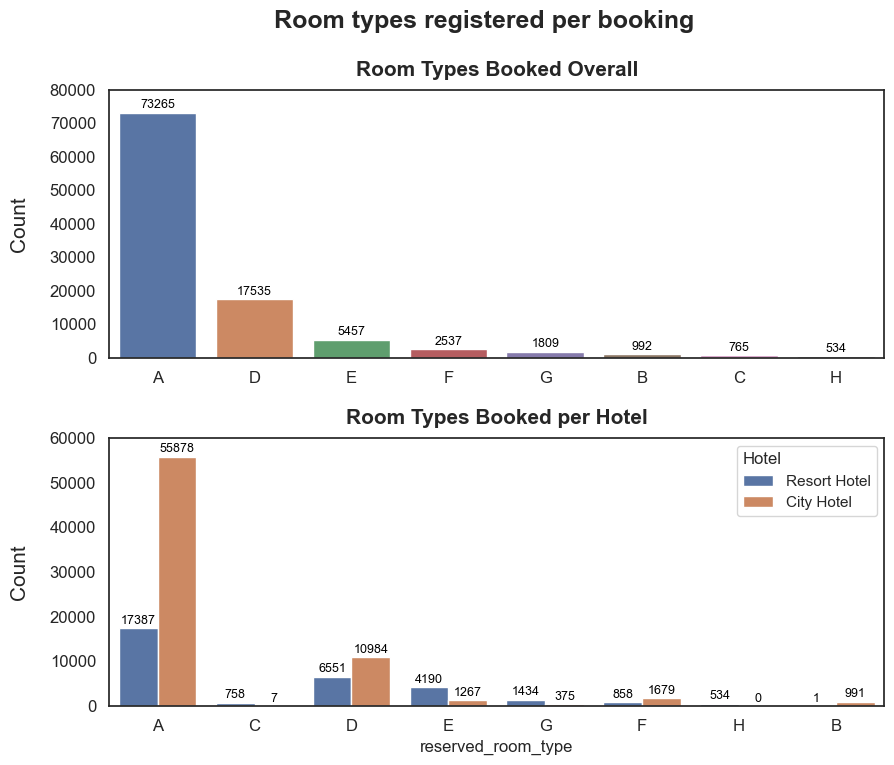

In [336]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.suptitle("Room types registered per booking", fontsize = 18, fontweight = "bold")

room_types_overall = df.reserved_room_type.value_counts().to_frame(name = "Count")
ax = sns.barplot(data = room_types_overall, 
                 x = room_types_overall.index.values, 
                 y = "Count")
plt.title("Room Types Booked Overall", fontsize = 15, fontweight = "bold", pad = 10)
# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate(int(height),
                (x + width/2, y + height),
                xytext = (0, 1),
                textcoords = 'offset points',
                ha='center', 
                va = 'bottom',
                rotation = 0, 
                color = 'black',
                fontsize = 9)
plt.ylim([0, 80000])
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15, labelpad = 15)
plt.yticks(fontsize = 12)

plt.subplot(2,1,2)
plt.title("Room Types Booked per Hotel", fontsize = 15, fontweight = "bold", pad = 10)
ax = sns.countplot(data = df,
                   x = "reserved_room_type", 
                   hue = "hotel")
# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate(int(height),
                (x + width/2, y + height),
                xytext = (0, 1),
                textcoords = 'offset points',
                ha='center', 
                va = 'bottom',
                rotation = 0, 
                color = 'black',
                fontsize = 9)
plt.ylim([0, 60000])
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15, labelpad = 15)
plt.yticks(fontsize = 12)
plt.legend()

plt.subplots_adjust(hspace = 0.3)   # set the spacing between subplots
plt.legend(title = "Hotel", alignment = "left")
plt.show()

## 6.6 What is the distribution of the lead time (overall and per Hotel)?

In [337]:
print(f"The Lead Time for both hotels ranges between {df.lead_time.min()} and {df.lead_time.max()} days.")

The Lead Time for both hotels ranges between 0 and 629 days.


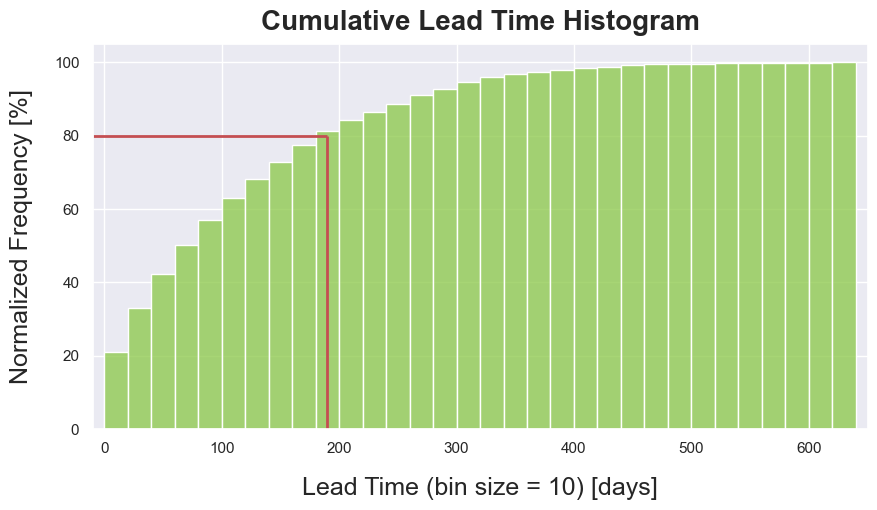

In [338]:
bin_width = 20

sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data = df, x = df.lead_time, binwidth = bin_width, element = "bars", stat = "percent", cumulative = True, color = "#8AC847")
plt.title("Cumulative Lead Time Histogram", fontsize = 20, fontweight = "bold", pad = 10)
plt.xlabel("Lead Time (bin size = 10) [days]", fontsize = 18, labelpad = 15) 
plt.ylabel("Normalized Frequency [%]", fontsize = 18, labelpad = 15)
plt.xlim(left = df.lead_time.min() - 10, right = math.ceil(df.lead_time.max() / bin_width) * bin_width + 10)
plt.grid(visible = True)
plt.hlines(y = 80, xmin = -10, xmax = 190, linewidth = 2, color = 'r')
plt.vlines(x = 190, ymin = 0, ymax = 80, linewidth = 2, color = 'r')
plt.show()

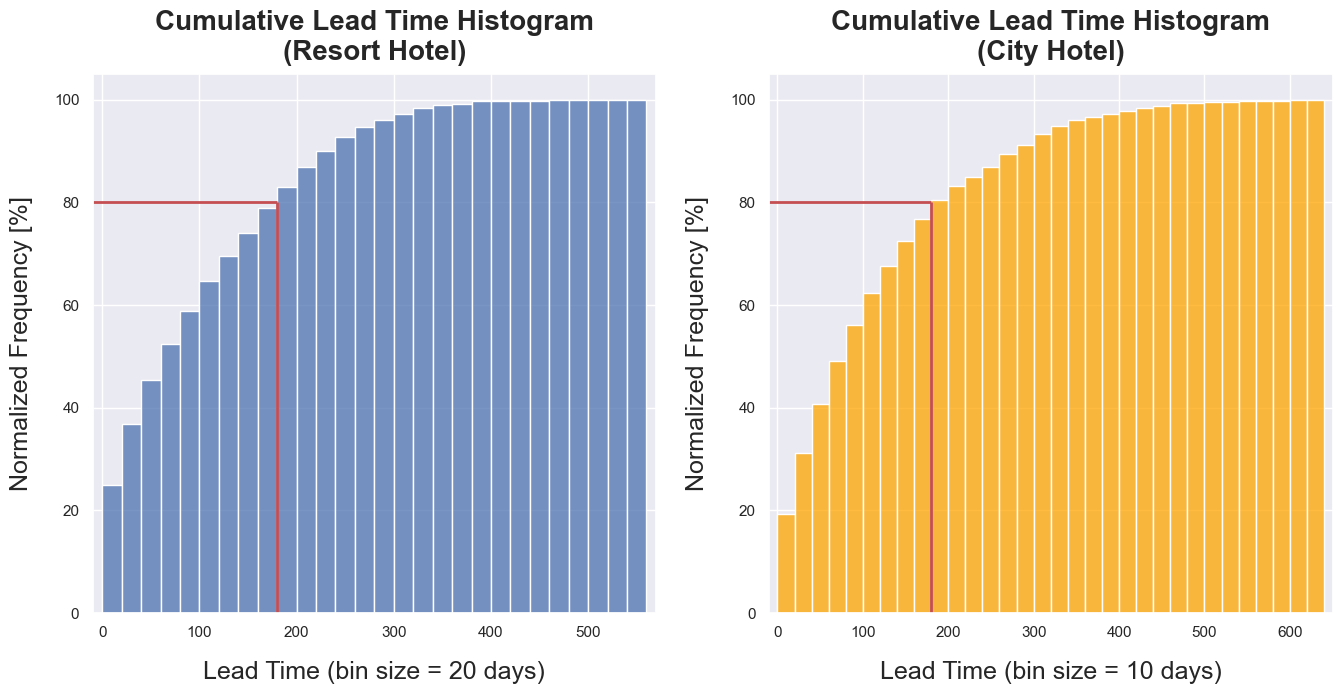

In [339]:
resort_hotel_df = df.loc[df.hotel == "Resort Hotel"]
city_hotel_df = df.loc[df.hotel == "City Hotel"]
bin_width = 20

sns.set_theme()
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
sns.histplot(data = resort_hotel_df, x = resort_hotel_df.lead_time, binwidth = bin_width, element = "bars", stat = "percent", cumulative = True)
plt.title("Cumulative Lead Time Histogram\n(Resort Hotel)", fontsize = 20, fontweight = "bold", pad = 10)
plt.xlabel(f"Lead Time (bin size = {bin_width} days)", fontsize = 18, labelpad = 15) 
plt.ylabel("Normalized Frequency [%]", fontsize = 18, labelpad = 15)
plt.xlim(left = resort_hotel_df.lead_time.min() -10, right = math.ceil(resort_hotel_df.lead_time.max() / bin_width) * bin_width + 10)
plt.grid(visible = True)
plt.hlines(y = 80, xmin = -10, xmax = 180, linewidth = 2, color = 'r')
plt.vlines(x = 180, ymin = 0, ymax = 80, linewidth = 2, color = 'r')

plt.subplot(1, 2, 2)
sns.histplot(data = city_hotel_df, x = city_hotel_df.lead_time, binwidth = bin_width, element = "bars", stat = "percent", cumulative = True, color = "orange")
plt.title("Cumulative Lead Time Histogram\n(City Hotel)", fontsize = 20, fontweight = "bold", pad = 10)
plt.xlabel("Lead Time (bin size = 10 days)", fontsize = 18, labelpad = 15) 
plt.ylabel("Normalized Frequency [%]", fontsize = 18, labelpad = 15)
plt.xlim(left = city_hotel_df.lead_time.min() -10, right = math.ceil(city_hotel_df.lead_time.max() / bin_width) * bin_width + 10)
plt.grid(visible = True)
plt.hlines(y = 80, xmin = -10, xmax = 180, linewidth = 2, color = 'r')
plt.vlines(x = 180, ymin = 0, ymax = 80, linewidth = 2, color = 'r')

plt.show()

## 6.7 What is the number of rooms cancelled after the booking was made (per hotel)? 

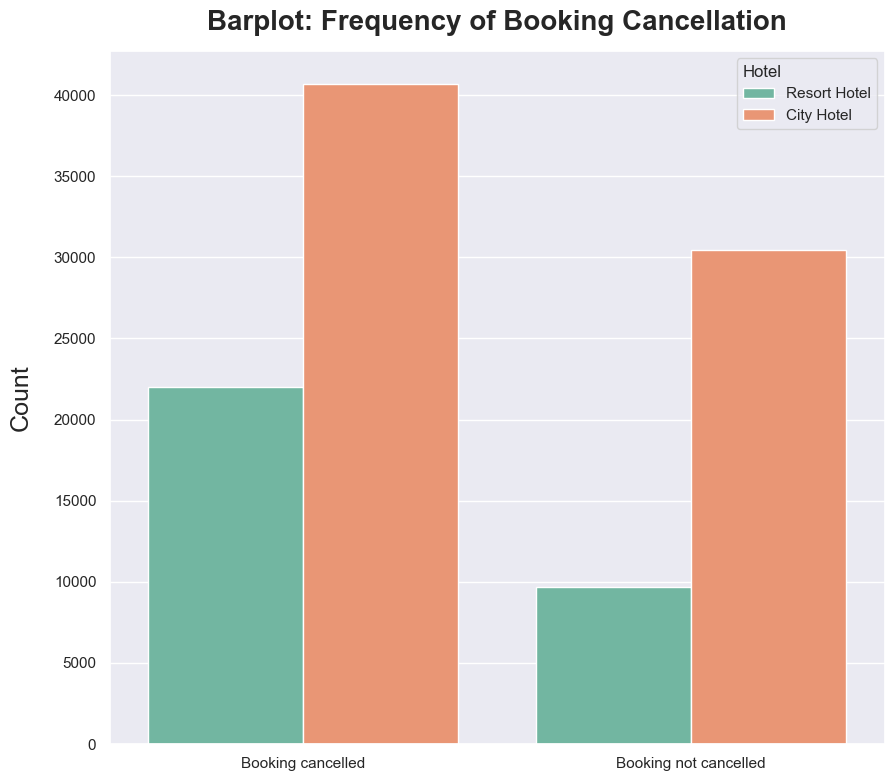

In [340]:
plt.figure(figsize=(10,9))
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel', palette= 'Set2')
plt.title('Barplot: Frequency of Booking Cancellation', fontsize = 20, fontweight = "bold", pad = 15)
plt.xlabel("")
plt.ylabel("Count", fontsize = 18, labelpad = 15)
plt.xticks([0, 1], ["Booking cancelled", "Booking not cancelled"])
# adding the annotations to the bars: 
for p in ax.patches:
    width = p.get_width()
    height = np.round(p.get_height(), decimals = 2)
    x, y = p.get_xy() 
    ax.annotate(int(height),
                (x + width/2, y + height),
                xytext = (0, 1),
                textcoords = 'offset points',
                ha='center', 
                va = 'bottom',
                rotation = 0, 
                color = 'black',
                fontsize = 7)
plt.legend(title = "Hotel", alignment = "left")
plt.show()